In [149]:
#pip install pandas numpy matplotlib seaborn tensorflow scikit-learn

In [150]:
#Imports & Environment Check
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [151]:
# =========================
# Load Market Trend Dataset
# =========================
train_df = pd.read_csv("../../data/training_data.csv")
test_df  = pd.read_csv("../../data/test_data.csv")

assert not train_df.empty and not test_df.empty

print("Training shape:", train_df.shape)
print("Test shape:", test_df.shape)

# =========================
# Convert Date column to datetime & extract time features
# =========================
for df in [train_df, test_df]:
    df["Date"] = pd.to_datetime(df["Date"])
    df["Year"]  = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Day"]   = df["Date"].dt.day
    df.drop(columns=["Date"], inplace=True)

train_df.head()


Training shape: (24000, 15)
Test shape: (6000, 15)


,Open_Price,Close_Price,High_Price,Low_Price,Volume,Daily_Return_Pct,Volatility_Range,VIX_Close,Economic_News_Flag,Sentiment_Score,Federal_Rate_Change_Flag,GeoPolitical_Risk_Score,Currency_Index,Close_Price_Normalized,Year,Month,Day
0,46.14,44.01,46.60,42.82,12834123,-4.6164,3.78,22.47,1,-0.544,1,8.71,92.11,0.331842,1986,1,23
1,79.41,79.52,80.64,78.10,3822946,0.1385,2.54,39.96,0,-0.332,0,55.43,97.66,0.605817,1903,8,25
2,37.88,37.11,38.25,37.07,5306690,-2.0327,1.18,44.40,0,0.962,1,44.54,82.79,0.278605,1990,8,14
3,60.87,61.44,61.55,59.28,15075128,0.9364,2.27,34.51,0,0.677,0,7.85,80.36,0.466322,1905,1,19
4,8.11,7.93,8.47,7.60,13982675,-2.2195,0.87,34.29,0,-0.296,0,67.17,107.15,0.053468,1968,3,11


In [152]:
TARGET = "Close_Price"
DROP_COLS = ["Close_Price_Normalized"]  # Date already removed

X_train = train_df.drop(columns=DROP_COLS + [TARGET])
y_train = train_df[TARGET].values

X_test  = test_df.drop(columns=DROP_COLS + [TARGET])
y_test  = test_df[TARGET].values

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)



X_train shape: (24000, 15)
y_train shape: (24000,)


In [153]:
import joblib
from sklearn.preprocessing import StandardScaler

# =========================
# Scale ONLY features
# =========================
x_scaler = StandardScaler()

X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled  = x_scaler.transform(X_test)

# =========================
# Target remains REAL scale
# =========================
y_train_used = y_train
y_test_used  = y_test


In [ ]:
# =========================
# Build ANN Model
# =========================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

INPUT_DIM = X_train.shape[1]

model = Sequential([
    Dense(256, activation='relu',
          kernel_regularizer=l2(0.0005),
          input_shape=(INPUT_DIM,)),
    BatchNormalization(),
    Dropout(0.35),

    Dense(128, activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dense(1)

])

model.compile(
    optimizer=Adam(learning_rate=0.0007),
    loss='mse',
    metrics=['mae']
)

model.summary()




Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 256)               4096      
                                                                 
 batch_normalization_14 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_15 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_15 (Dropout)        (None, 128)              

Epoch 1/200
750/750 [==============================] - 1s 860us/step - loss: 285.4384 - mae: 11.5813 - val_loss: 4.9952 - val_mae: 1.6958 - lr: 7.0000e-04
Epoch 2/200
750/750 [==============================] - 1s 845us/step - loss: 56.6739 - mae: 5.5834 - val_loss: 2.6319 - val_mae: 1.2745 - lr: 7.0000e-04
Epoch 3/200
750/750 [==============================] - 1s 810us/step - loss: 45.6768 - mae: 5.0383 - val_loss: 4.7825 - val_mae: 1.7307 - lr: 7.0000e-04
Epoch 4/200
750/750 [==============================] - 1s 886us/step - loss: 40.1490 - mae: 4.7465 - val_loss: 3.7726 - val_mae: 1.5581 - lr: 7.0000e-04
Epoch 5/200
750/750 [==============================] - 1s 811us/step - loss: 32.3627 - mae: 4.2628 - val_loss: 5.1604 - val_mae: 1.7995 - lr: 7.0000e-04
Epoch 6/200
750/750 [==============================] - 1s 808us/step - loss: 29.0648 - mae: 4.0548 - val_loss: 2.3974 - val_mae: 1.1688 - lr: 7.0000e-04
Epoch 7/200
750/750 [==============================] - 1s 783us/step - loss: 25.

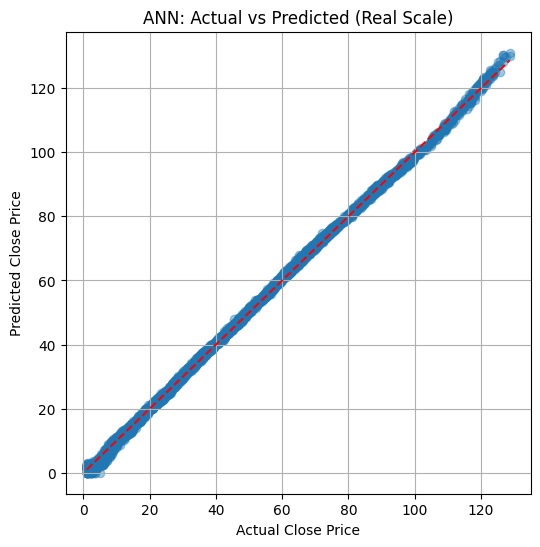

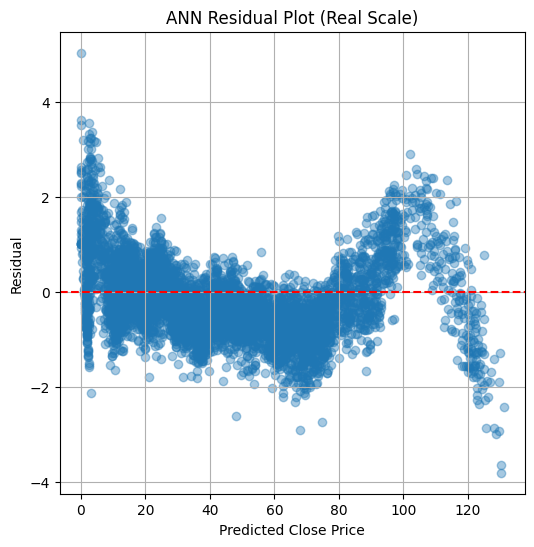

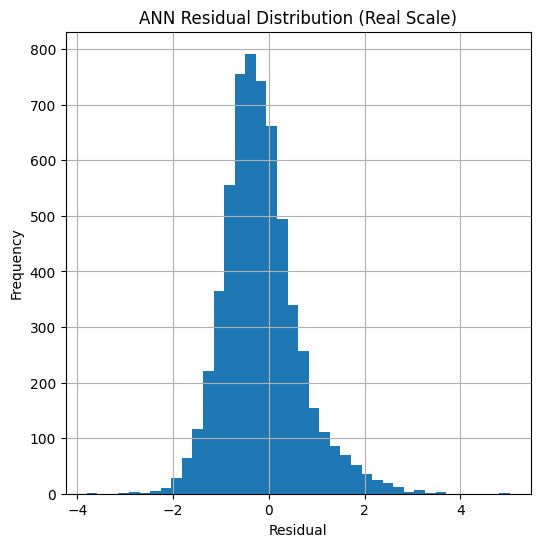

In [155]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Callbacks
# =========================
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=15,
    restore_best_weights=True
)

lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=7,
    min_lr=1e-5,
    verbose=1
)

# =========================
# Train Model (REAL SCALE)
# =========================
history = model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)


# =========================
# Predictions (REAL SCALE)
# =========================
y_pred = model.predict(X_test_scaled).flatten()

# =========================
# Metrics (REAL SCALE)
# =========================
rmse = np.sqrt(mean_squared_error(y_test_used, y_pred))
r2   = r2_score(y_test_used, y_pred)

print(f"ANN RMSE: {rmse:.6f}")
print(f"ANN R²: {r2:.6f}")

# =========================
# Residuals
# =========================
residuals = y_test_used - y_pred

# =========================
# Actual vs Predicted Plot
# =========================
plt.figure(figsize=(6,6))
plt.scatter(y_test_used, y_pred, alpha=0.4)
plt.plot(
    [y_test_used.min(), y_test_used.max()],
    [y_test_used.min(), y_test_used.max()],
    "r--"
)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("ANN: Actual vs Predicted (Real Scale)")
plt.grid(True)
plt.show()

# =========================
# Residual Plot
# =========================
plt.figure(figsize=(6,6))
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Close Price")
plt.ylabel("Residual")
plt.title("ANN Residual Plot (Real Scale)")
plt.grid(True)
plt.show()

# =========================
# Residual Distribution
# =========================
plt.figure(figsize=(6,6))
plt.hist(residuals, bins=40)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("ANN Residual Distribution (Real Scale)")
plt.grid(True)
plt.show()


In [156]:
y_check = model.predict(X_test_scaled).flatten()
print("ANN sanity check:")
print("min:", y_check.min())
print("max:", y_check.max())
print("mean:", y_check.mean())



188/188 [==============================] - 0s 348us/step
ANN sanity check:
min: 0.0
max: 131.05873
mean: 43.37963


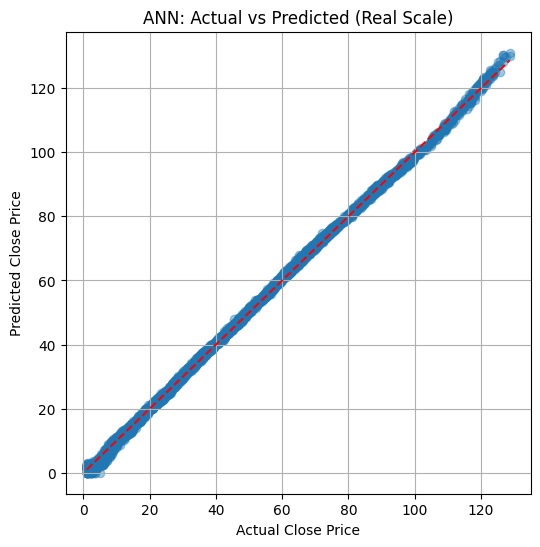

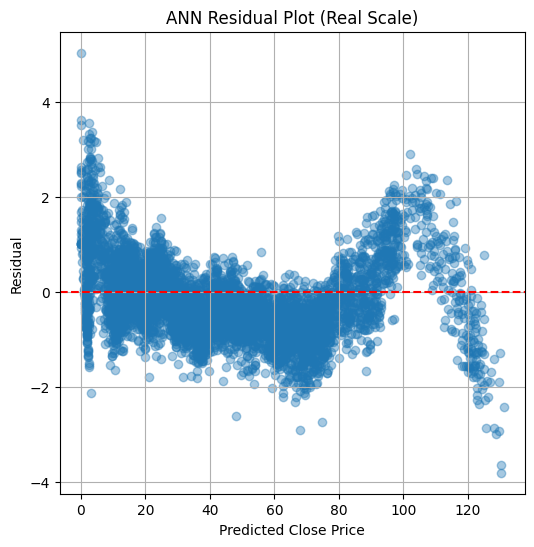

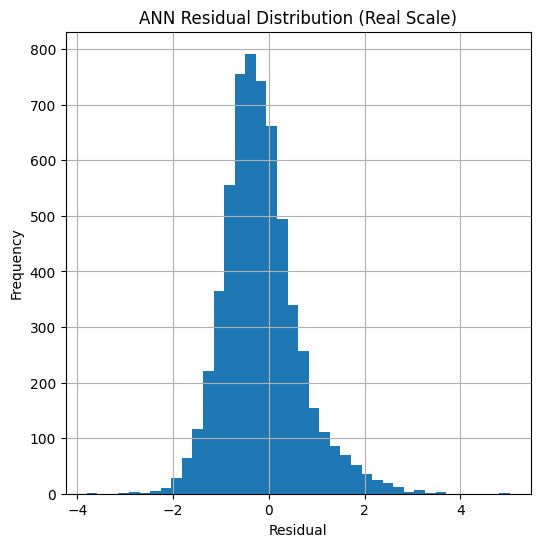

In [157]:
import os
import matplotlib.pyplot as plt

# =========================
# Output directory
# =========================
output_dir = "../../documentation/"
os.makedirs(output_dir, exist_ok=True)

# =========================
# Actual vs Predicted Plot (REAL SCALE)
# =========================
plt.figure(figsize=(6, 6))
plt.scatter(y_test_used, y_pred, alpha=0.4)
plt.plot(
    [y_test_used.min(), y_test_used.max()],
    [y_test_used.min(), y_test_used.max()],
    "r--"
)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("ANN: Actual vs Predicted (Real Scale)")
plt.grid(True)

plt.savefig(
    os.path.join(output_dir, "ann_actual_vs_predicted_real.png"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()

# =========================
# Residual Diagnostics (REAL SCALE)
# =========================
residuals = y_test_used - y_pred

plt.figure(figsize=(6, 6))
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Close Price")
plt.ylabel("Residual")
plt.title("ANN Residual Plot (Real Scale)")
plt.grid(True)

plt.savefig(
    os.path.join(output_dir, "ann_residual_plot_real.png"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()

# =========================
# Residual Distribution (REAL SCALE)
# =========================
plt.figure(figsize=(6, 6))
plt.hist(residuals, bins=40)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("ANN Residual Distribution (Real Scale)")
plt.grid(True)

plt.savefig(
    os.path.join(output_dir, "ann_residual_distribution_real.png"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()


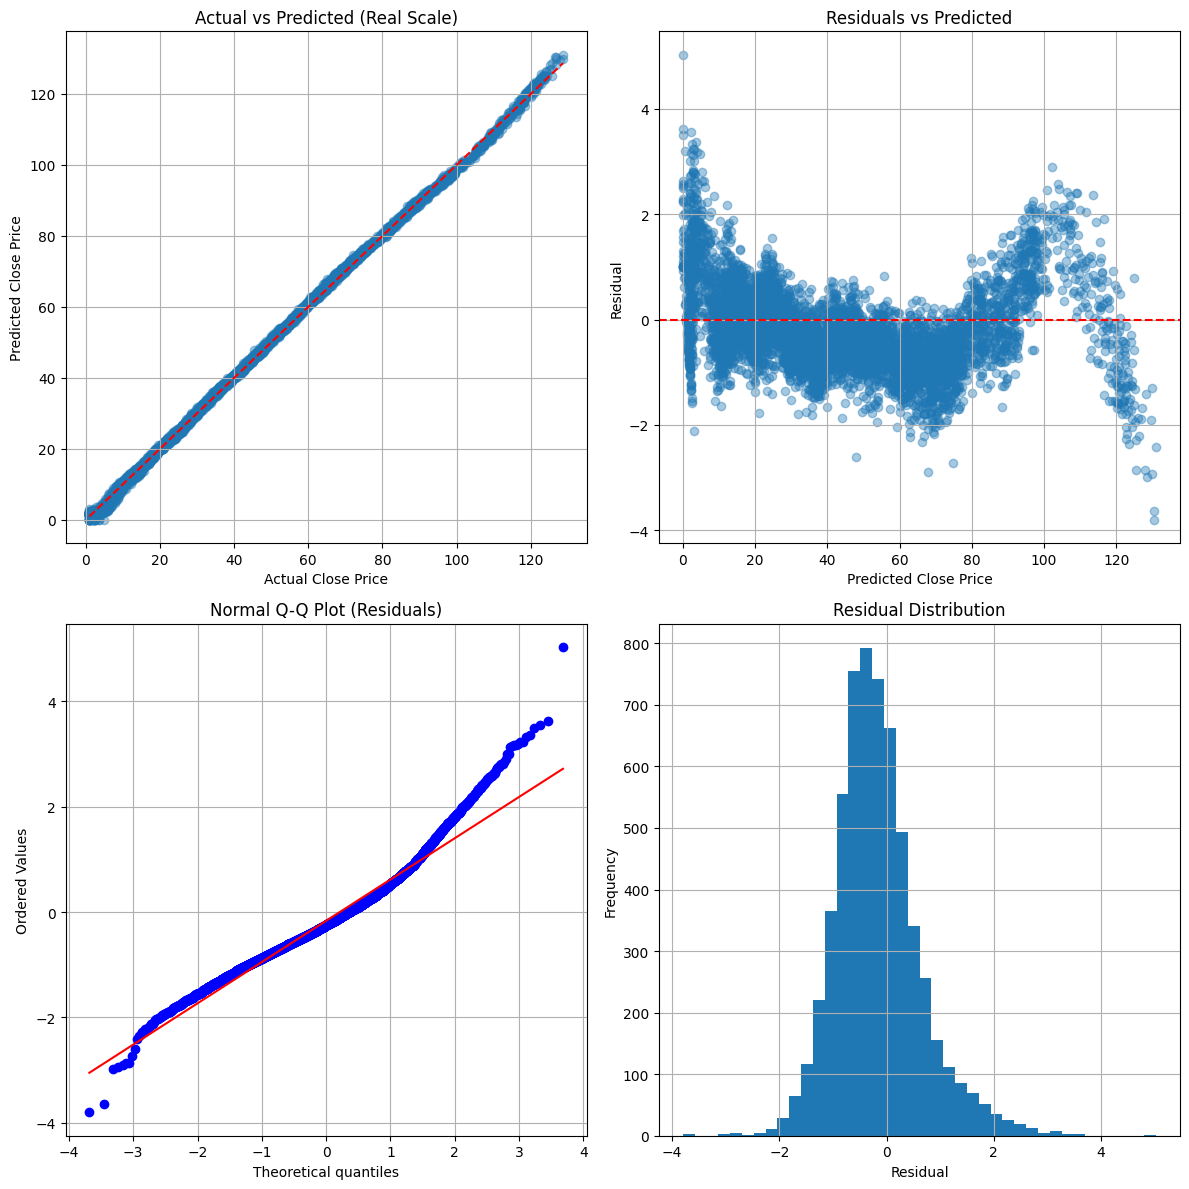

In [158]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# =========================
# Output directory
# =========================
output_dir = "../../documentation/"
os.makedirs(output_dir, exist_ok=True)

# =========================
# ANN Diagnostics Data (REAL SCALE)
# =========================
predicted = y_pred
residuals = y_test_used - y_pred

# =========================
# Create 2x2 diagnostic figure
# =========================
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# ---- 1. Actual vs Predicted ----
axes[0, 0].scatter(y_test_used, predicted, alpha=0.4)
axes[0, 0].plot(
    [y_test_used.min(), y_test_used.max()],
    [y_test_used.min(), y_test_used.max()],
    "r--"
)
axes[0, 0].set_title("Actual vs Predicted (Real Scale)")
axes[0, 0].set_xlabel("Actual Close Price")
axes[0, 0].set_ylabel("Predicted Close Price")
axes[0, 0].grid(True)

# ---- 2. Residuals vs Predicted ----
axes[0, 1].scatter(predicted, residuals, alpha=0.4)
axes[0, 1].axhline(0, color="red", linestyle="--")
axes[0, 1].set_title("Residuals vs Predicted")
axes[0, 1].set_xlabel("Predicted Close Price")
axes[0, 1].set_ylabel("Residual")
axes[0, 1].grid(True)

# ---- 3. Normal Q-Q Plot (Residuals) ----
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title("Normal Q-Q Plot (Residuals)")
axes[1, 0].grid(True)

# ---- 4. Residual Distribution ----
axes[1, 1].hist(residuals, bins=40)
axes[1, 1].set_title("Residual Distribution")
axes[1, 1].set_xlabel("Residual")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].grid(True)

# =========================
# Save combined diagnostics
# =========================
plt.tight_layout()
plt.savefig(
    os.path.join(output_dir, "ann_diagnostic_plots_combined.png"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()


In [159]:
# =========================
# Predict (REAL SCALE)
# =========================
y_pred = model.predict(X_test_scaled).flatten()

# =========================
# Evaluate (REAL SCALE)
# =========================
rmse = np.sqrt(mean_squared_error(y_test_used, y_pred))
r2   = r2_score(y_test_used, y_pred)

print(f"ANN RMSE: {rmse:.4f}")
print(f"ANN R²: {r2:.4f}")


188/188 [==============================] - 0s 327us/step
ANN RMSE: 0.8137
ANN R²: 0.9992


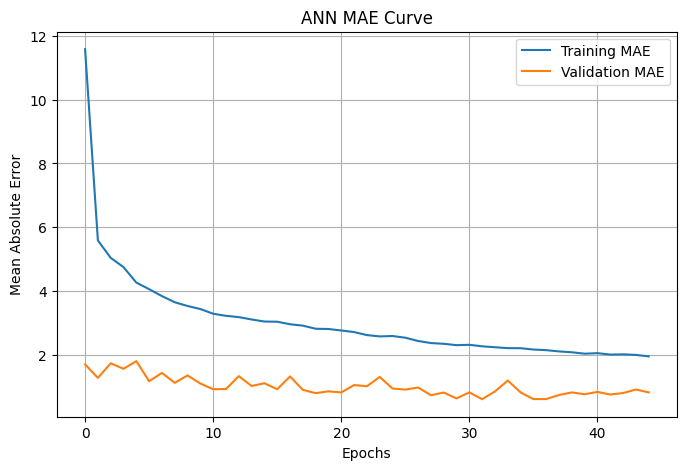

In [160]:
plt.figure(figsize=(8,5))
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("ANN MAE Curve")
plt.legend()
plt.grid(True)
plt.savefig("../../documentation/mae_curve.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

In [161]:
#Build ANN Model (TensorFlow)
# model = Sequential([
#     Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
#     Dense(32, activation="relu"),
#     Dense(1, activation="linear")
# ])

# model.compile(
#     optimizer=Adam(learning_rate=0.001),
#     loss="mse",
#     metrics=["mae"]
# )

# model.summary()

In [162]:
#Train the Model
# early_stop = EarlyStopping(
#     monitor="val_loss",
#     patience=10,
#     restore_best_weights=True
# )

# history = model.fit(
#     X_train_scaled,
#     y_train,
#     validation_data=(X_test_scaled, y_test),
#     epochs=100,
#     batch_size=32,
#     callbacks=[early_stop],
#     verbose=1
# )

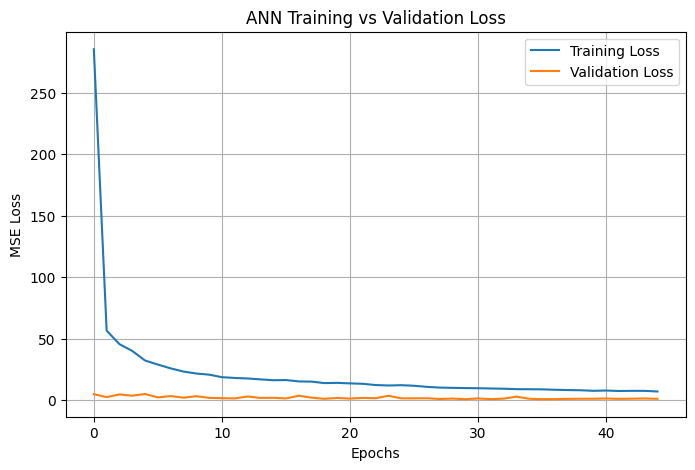

In [163]:
# Training & Validation Loss Curve
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("ANN Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.savefig("../../documentation/training_curve.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

In [164]:
# Save Trained ANN Model
MODEL_PATH = "currentAiSolution.h5"
model.save(MODEL_PATH)
print("Model saved.")


Model saved.


/Users/shashankkalaskar/miniconda3/envs/tf215/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [165]:
metrics_df = pd.DataFrame({
    "RMSE": [rmse],
    "R2": [r2],
    "Final_Train_Loss": [history.history["loss"][-1]],
    "Final_Val_Loss": [history.history["val_loss"][-1]]
})

metrics_df.to_csv("ann_metrics.csv", index=False)


In [166]:
# =========================
# Activation / Inference on New Market Data
# =========================

ACTIVATION_PATH = "../../data/activation_data.csv"
activation_df = pd.read_csv(ACTIVATION_PATH)

# Rebuild date features exactly like training
activation_df["Date"] = pd.to_datetime(activation_df["Date"])
activation_df["Year"]  = activation_df["Date"].dt.year
activation_df["Month"] = activation_df["Date"].dt.month
activation_df["Day"]   = activation_df["Date"].dt.day

# Build feature matrix exactly like training
X_activation = activation_df.drop(columns=["Date", "Close_Price"], errors="ignore")

# Align columns with training features
X_activation = X_activation.reindex(columns=X_train.columns, fill_value=0)

# Scale activation features
X_activation_scaled = x_scaler.transform(X_activation)

# Predict (REAL SCALE)
y_activation_pred = model.predict(X_activation_scaled).flatten()

# Attach prediction
activation_df["Predicted_Close_Price"] = y_activation_pred

activation_df[["Close_Price", "Predicted_Close_Price"]].head()


1/1 [==============================] - 0s 9ms/step


,Close_Price,Predicted_Close_Price
0,11.62,10.75389


In [167]:
import os
import joblib

joblib.dump(x_scaler, "scaler.pkl")

print("Scalers saved correctly")



Scalers saved correctly
